In [ ]:
# CS7290 Final Project 
## Nickhil Tekwani

Project Background

In [1]:
import re
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## PROMED

In [16]:
file_path = "./promed/summaries/ids"

with open(file_path) as f:
    data = f.readlines()

# Extract the fourth field from each line, and then extract the text before the first comma
text_items = [re.search(r'^([^,]+)', line.split('\t')[3]).group(1).strip() for line in data]

# Count the frequency of each text item
freq_counts = Counter(text_items)

# Create a dataframe with two columns: number and disease
df = pd.DataFrame(freq_counts.most_common(), columns=["disease", "number"])

# Iterate over the disease column and remove the text before the rightmost '>' and the space after it
df['disease'] = df['disease'].apply(lambda x: x.split('>')[-1].strip())

print(len(df))
df.head(20)

42590


,disease,number
0,Avian influenza,1888
1,Cholera,1049
2,Anthrax,1035
3,Salmonellosis,728
4,Rabies,636
5,Foot & mouth disease,350
6,Hand,294
7,West Nile virus,286
8,Meningitis,280
9,Undiagnosed deaths,279


In [3]:
# Read the content of the file "ids"
with open(file_path) as f:
    data = f.readlines()

# Extract the required information from each line and save it in a list of dictionaries
records = []
for line in data:
    fields = line.split('\t')
    id1, id2, date_id = fields[:3]
    subject = re.search(r'^([^,]+)', fields[3]).group(1).strip()
    subject = subject.split('>')[-1].strip()
    records.append({"id1": id1, "id2": id2, "date.id": date_id, "subject": subject})

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(records)

# Split the "date.id" column into "date" and "id_part" columns
df[['date', 'id_part']] = df['date.id'].str.split('.', n=1, expand=True)

# Convert the "date" column to a datetime object, handling errors by replacing with NaN
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d', errors='coerce')

# Replace any rows with invalid dates with NaN
df.loc[df['date'].isna(), ['date', 'id_part']] = pd.NaT

# Convert the "date" column back to a string in the desired format
df['date'] = df['date'].dt.strftime('%Y/%m/%d')

# Display the resulting DataFrame
df.head(50)


,id1,id2,date.id,subject,date,id_part
0,026000,026000,20040328.0851,Undiagnosed deaths,2004/03/28,0851
1,004000,004000,20181112.6141091,Ebola update (130): Congo DR (NK,2018/11/12,6141091
2,062000,062000,20090423.1532,Hemorrhagic fever with renal syndrome - Turkey (03): (ZO),2009/04/23,1532
3,059000,059000,19971214.2481,Monkeypox - Congo,1997/12/14,2481
4,040000,040000,20200425.7266556,COVID-19 update (130): USA (NY) animal,2020/04/25,7266556
5,037000,037000,20060421.1167,Lumpy skin disease,2006/04/21,1167
6,015000,015000,20031023.2656,Skin infections,2003/10/23,2656
7,051000,051000,20181016.6094414,Anthrax - Ukraine (04): (OD) bovine,2018/10/16,6094414
8,048000,048000,20070511.1512,Avian influenza,2007/05/11,1512
9,061000,061000,20080604.1791,Undiagnosed fatal disease: North Korea,2008/06/04,1791


In [4]:
avian_influenza_df_promed = df[df['subject'].notna() & df['subject'].str.contains('Avian influenza', case=False)].copy()
cholera_df_promed = df[df['subject'].notna() & df['subject'].str.contains('Cholera', case=False)].copy()
anthrax_df_promed = df[df['subject'].notna() & df['subject'].str.contains('Anthrax', case=False)].copy()
salmonellosis_df_promed = df[df['subject'].notna() & df['subject'].str.contains('Salmonellosis', case=False)].copy()
rabies_df_promed = df[df['subject'].notna() & df['subject'].str.contains('Rabies', case=False)].copy()
meningitis_df_promed = df[df['subject'].notna() & df['subject'].str.contains('Meningitis', case=False)].copy()
plague_df_promed = df[df['subject'].notna() & df['subject'].str.contains('Plague', case=False)].copy()
west_nile_df_promed = df[df['subject'].notna() & df['subject'].str.contains('West Nile virus', case=False)].copy()
    
df_mapping = {'Avian influenza': avian_influenza_df_promed, 'Cholera': cholera_df_promed, 
              'Anthrax': anthrax_df_promed, 'Salmonellosis': salmonellosis_df_promed, 'Rabies': rabies_df_promed,
             'Meningitis': meningitis_df_promed, 'Plague': plague_df_promed, 'West Nile virus': west_nile_df_promed}

for disease, disease_df in df_mapping.items():
    print(f"{disease} dataframe has {len(disease_df)} rows")


Avian influenza dataframe has 5103 rows
Cholera dataframe has 1516 rows
Anthrax dataframe has 2590 rows
Salmonellosis dataframe has 1217 rows
Rabies dataframe has 2114 rows
Meningitis dataframe has 516 rows
Plague dataframe has 616 rows
West Nile virus dataframe has 1286 rows


## WHO

In [5]:
# copy promed data into new df
promed_df = df.copy()

# Define the column names for the WHO DataFrame
col_names = ["Difference in Days", "col2", "cosine", "col4", "who_link", "promed_link"]

# Read in data from "deltas"
deltas_data = pd.read_csv("deltas", sep="\t", header=None, names=col_names)

deltas_data['id_extracted'] = deltas_data['promed_link'].str.extract(r'(\d+\.\d+)')

print(len(deltas_data), "Total Records")
deltas_data.head()

6599 Total Records


,Difference in Days,col2,cosine,col4,who_link,promed_link,id_extracted
0,0.000,211,0.991082,1002356,https://www.who.int/emergencies/disease-outbreak-news/item/2008_01_11-en,https://promedmail.org/promed-post/?id=20080111.0150,20080111.0150
1,200.042,211,0.988157,1002491,https://www.who.int/emergencies/disease-outbreak-news/item/2007_06_25a-en,https://promedmail.org/promed-post/?id=20080111.0150,20080111.0150
2,219.042,211,0.988083,1002052,https://www.who.int/emergencies/disease-outbreak-news/item/2007_06_06-en,https://promedmail.org/promed-post/?id=20080111.0150,20080111.0150
3,210.042,211,0.987678,1000623,https://www.who.int/emergencies/disease-outbreak-news/item/2007_06_15-en,https://promedmail.org/promed-post/?id=20080111.0150,20080111.0150
4,0.000,258,0.992048,1000228,https://www.who.int/emergencies/disease-outbreak-news/item/2010_09_08-en,https://promedmail.org/promed-post/?id=20100908.3237,20100908.3237


In [6]:
# merge 2 df's to get WHO data correlated with subject as determined earlier 
# we know that the WHO and PROMED link columns are associated already in the deltas data set
merged_df = promed_df.merge(deltas_data, left_on='date.id', right_on='id_extracted', how='inner')
merged_df.head()

# top diseases in promed links as mentioned above
disease_names = ['Avian influenza', 'Cholera', 'Anthrax', 'Salmonellosis', 'Rabies', 
                 'Foot & mouth disease', 'Hand', 'West Nile virus', 'Meningitis', 
                 'Undiagnosed deaths', 'Plague', 'Chronic wasting disease', 
                 'Undiagnosed die-off', 'Brucellosis', 'E. coli O157', 'Undiagnosed disease']
# add new column for the top 20
merged_df['subject_keyword'] = merged_df['subject'].apply(lambda x: next((disease for disease in disease_names if disease in x), 'other'))

# clean up a little bit
merged_df = merged_df.drop(columns=['id1', 'id2', 'date.id', 'id_part', 'col2', 'col4'])

merged_df.head(50)

,subject,date,Difference in Days,cosine,who_link,promed_link,id_extracted,subject_keyword
0,Cholera,2005/09/03,-20.000,0.970729,https://www.who.int/emergencies/disease-outbreak-news/item/2005_09_23-en,https://promedmail.org/promed-post/?id=20050903.2605,20050903.2605,Cholera
1,Cholera,2005/09/03,8.000,0.968847,https://www.who.int/emergencies/disease-outbreak-news/item/2005_08_26-en,https://promedmail.org/promed-post/?id=20050903.2605,20050903.2605,Cholera
2,Cholera,2005/09/03,-279.000,0.963661,https://www.who.int/emergencies/disease-outbreak-news/item/2006_06_09-en,https://promedmail.org/promed-post/?id=20050903.2605,20050903.2605,Cholera
3,Cholera,2005/09/03,-752.000,0.950517,https://www.who.int/emergencies/disease-outbreak-news/item/2007_09_25-en,https://promedmail.org/promed-post/?id=20050903.2605,20050903.2605,Cholera
4,Avian influenza,2014/06/18,63.000,0.984354,https://www.who.int/emergencies/disease-outbreak-news/item/2014_04_16_h7n9-en,https://promedmail.org/promed-post/?id=20140618.2550019,20140618.2550019,Avian influenza
5,Avian influenza,2014/06/18,99.000,0.981772,https://www.who.int/emergencies/disease-outbreak-news/item/2014_03_11c-en,https://promedmail.org/promed-post/?id=20140618.2550019,20140618.2550019,Avian influenza
6,Avian influenza,2014/06/18,93.000,0.981448,https://www.who.int/emergencies/disease-outbreak-news/item/2014_03_17_h7n9-en,https://promedmail.org/promed-post/?id=20140618.2550019,20140618.2550019,Avian influenza
7,Avian influenza,2014/06/18,75.000,0.979964,https://www.who.int/emergencies/disease-outbreak-news/item/2014_04_04-en,https://promedmail.org/promed-post/?id=20140618.2550019,20140618.2550019,Avian influenza
8,Avian influenza,2014/06/18,16239.200,0.979108,https://www.who.int/emergencies/disease-outbreak-news/item/29-october-2014-avian-influenza-en,https://promedmail.org/promed-post/?id=20140618.2550019,20140618.2550019,Avian influenza
9,Avian influenza,2014/06/18,82.000,0.978843,https://www.who.int/emergencies/disease-outbreak-news/item/2014_03_28-en,https://promedmail.org/promed-post/?id=20140618.2550019,20140618.2550019,Avian influenza


In [7]:
print(len(merged_df))
merged_df['subject_keyword'].value_counts().sort_values(ascending=False).head(10)

6691


other                  4192
Avian influenza        1915
Cholera                 420
Meningitis               72
Plague                   45
West Nile virus          25
Undiagnosed deaths        8
Salmonellosis             5
Hand                      5
Undiagnosed disease       2
Name: subject_keyword, dtype: int64

In [8]:
avian_influenza_df_who = merged_df[merged_df['subject_keyword'].notna() & merged_df['subject_keyword'].str.contains('Avian influenza', case=False)].copy()
cholera_df_who = merged_df[merged_df['subject_keyword'].notna() & merged_df['subject_keyword'].str.contains('Cholera', case=False)].copy()
anthrax_df_who = merged_df[merged_df['subject_keyword'].notna() & merged_df['subject_keyword'].str.contains('Anthrax', case=False)].copy()
salmonellosis_df_who = merged_df[merged_df['subject_keyword'].notna() & merged_df['subject_keyword'].str.contains('Salmonellosis', case=False)].copy()
rabies_df_who = merged_df[merged_df['subject_keyword'].notna() & merged_df['subject_keyword'].str.contains('Rabies', case=False)].copy()
meningitis_df_who = merged_df[merged_df['subject_keyword'].notna() & merged_df['subject_keyword'].str.contains('Meningitis', case=False)].copy()
plague_df_who = merged_df[merged_df['subject_keyword'].notna() & merged_df['subject_keyword'].str.contains('Plague', case=False)].copy()
west_nile_df_who = merged_df[merged_df['subject_keyword'].notna() & merged_df['subject_keyword'].str.contains('West Nile virus', case=False)].copy()
    
df_mapping_who = {'Avian influenza': avian_influenza_df_who, 'Cholera': cholera_df_who, 
              'Anthrax': anthrax_df_who, 'Salmonellosis': salmonellosis_df_who, 'Rabies': rabies_df_who, 
                  'Meningitis': meningitis_df_who, 'Plague': plague_df_who, 'West Nile virus': west_nile_df_who}

for disease, disease_df in df_mapping_who.items():
    print(f"{disease} dataframe has {len(disease_df)} rows")

Avian influenza dataframe has 1915 rows
Cholera dataframe has 420 rows
Anthrax dataframe has 0 rows
Salmonellosis dataframe has 5 rows
Rabies dataframe has 2 rows
Meningitis dataframe has 72 rows
Plague dataframe has 45 rows
West Nile virus dataframe has 25 rows


## Time Series Analysis

The most relevant diseases for us to look at are Avian influenza, Cholera, Meningitis, Plague, West Nile virus, Salmonellosis, and Rabies. 

In [9]:
relevant_promed_dfs = {'Avian influenza': avian_influenza_df_promed, 'Cholera': cholera_df_promed, 
                       'Meningitis': meningitis_df_promed, 'Plague': plague_df_promed, 
                       'West Nile virus': west_nile_df_promed, 'Salmonellosis': salmonellosis_df_promed, 
                       'Rabies': rabies_df_promed}

relevant_who_dfs = {'Avian influenza': avian_influenza_df_who, 'Cholera': cholera_df_who, 
                       'Meningitis': meningitis_df_who, 'Plague': plague_df_who, 
                       'West Nile virus': west_nile_df_who, 'Salmonellosis': salmonellosis_df_who, 
                       'Rabies': rabies_df_who}

# Define a function to find the top 5 peaks sorted by date
def find_top_peaks(df, column_name):
    df_sorted = df.sort_values(by=column_name, ascending=False).head(5)
    return df_sorted.sort_values(by='date')

# Create a dictionary to store the peak information
peak_data = {}

In [10]:
for disease, disease_df in relevant_promed_dfs.items():
    # print(f"Processing {disease} DataFrame")
    
    # Convert the 'date' column to a datetime object
    disease_df['date'] = pd.to_datetime(disease_df['date'])
    
    # Set the 'date' column as the index of the DataFrame
    disease_df.set_index('date', inplace=True)
    
    # Resample the data to a monthly frequency and count the number of records within each time period
    monthly_counts = disease_df.resample('M').count()
    monthly_counts = monthly_counts[['id1']].rename(columns={'id1': 'count'})
    monthly_counts.reset_index(inplace=True)
    
    # Create a line plot of the monthly counts
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_counts['date'], monthly_counts['count'])
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Monthly Counts of {disease} Records')
    plt.grid(True)
    plt.show()
    
    # Resample the data to a weekly frequency and count the number of records within each time period
    weekly_counts = disease_df.resample('W').count()
    weekly_counts = weekly_counts[['id1']].rename(columns={'id1': 'count'})
    weekly_counts.reset_index(inplace=True)
    
    # Filter the weekly_counts DataFrame to include data from 2007 to 2010
    weekly_counts_filtered = weekly_counts[(weekly_counts['date'] >= '2007-01-01') & (weekly_counts['date'] <= '2010-12-31')]
    
    # Create a line plot of the weekly counts for the specified time range
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_counts_filtered['date'], weekly_counts_filtered['count'])
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Weekly Counts of {disease} Records (2007-2010)')
    plt.grid(True)
    plt.show()
    
    # Find the top 5 peaks for monthly counts
    top_monthly_peaks = find_top_peaks(monthly_counts, 'count')
    
    # Find the top 5 peaks for weekly counts filtered (2007-2010)
    top_weekly_peaks_filtered = find_top_peaks(weekly_counts_filtered, 'count')
    
    # Store the peak data in the dictionary
    peak_data[disease] = {
        "Promed": {
            "Monthly": top_monthly_peaks,
            "Weekly (2007-2010)": top_weekly_peaks_filtered}}


In [11]:
for disease, disease_df in relevant_who_dfs.items():
    # print(f"Processing {disease} DataFrame")
    
    # Convert the 'date' column to a datetime object
    disease_df['date'] = pd.to_datetime(disease_df['date'])
    
    # Set the 'date' column as the index of the DataFrame
    disease_df.set_index('date', inplace=True)
    
    # Resample the data to a monthly frequency and count the number of records within each time period
    monthly_counts = disease_df.resample('M').count()
    monthly_counts = monthly_counts[['who_link']].rename(columns={'who_link': 'count'})
    monthly_counts.reset_index(inplace=True)
    
    # Create a line plot of the monthly counts
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_counts['date'], monthly_counts['count'])
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Monthly Counts of {disease} Records')
    plt.grid(True)
    plt.show()
    
    # Resample the data to a weekly frequency and count the number of records within each time period
    weekly_counts = disease_df.resample('W').count()
    weekly_counts = weekly_counts[['who_link']].rename(columns={'who_link': 'count'})
    weekly_counts.reset_index(inplace=True)
    
    # Filter the weekly_counts DataFrame to include data from 2007 to 2010
    weekly_counts_filtered = weekly_counts[(weekly_counts['date'] >= '2007-01-01') & (weekly_counts['date'] <= '2010-12-31')]
    
    # Create a line plot of the weekly counts for the specified time range
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_counts_filtered['date'], weekly_counts_filtered['count'])
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Weekly Counts of {disease} Records (2007-2010)')
    plt.grid(True)
    plt.show()
    
    # Find the top 5 peaks for monthly counts
    top_monthly_peaks = find_top_peaks(monthly_counts, 'count')
    
    # Find the top 5 peaks for weekly counts filtered (2007-2010)
    top_weekly_peaks_filtered = find_top_peaks(weekly_counts_filtered, 'count')
    
    # Store the peak data in the dictionary
    peak_data[disease]["WHO"] = {
        "Monthly": top_monthly_peaks,
        "Weekly (2007-2010)": top_weekly_peaks_filtered}

### Peak Based Time Series Analysis

In [12]:
# Create a function to convert peak data to a column with tuple format
def peak_data_to_column(peak_df):
    if peak_df.empty or len(peak_df.columns) != 2:
        return pd.Series(dtype=object)
    return peak_df.apply(lambda x: (x['date'].strftime('%Y-%m-%d'), x['count']), axis=1).reset_index(drop=True)


# Print the peak data
for disease, data in peak_data.items():
    print(f"{disease}:")

    # Create a new DataFrame for monthly data
    monthly_disease_peak_df = pd.DataFrame()
    
    # Fill the columns with peak data for different sources
    monthly_disease_peak_df['Promed Monthly'] = peak_data_to_column(data['Promed']['Monthly'])
    monthly_disease_peak_df['WHO Monthly'] = peak_data_to_column(data['WHO']['Monthly'])
    
    print("Monthly Data:")
    print(monthly_disease_peak_df)
    print("\n")
    
    # Create a new DataFrame for weekly data
    weekly_disease_peak_df = pd.DataFrame()

    # Fill the columns with peak data for different sources
    weekly_disease_peak_df['Promed Weekly (2007-2010)'] = peak_data_to_column(data['Promed']['Weekly (2007-2010)'])
    weekly_disease_peak_df['WHO Weekly (2007-2010)'] = peak_data_to_column(data['WHO']['Weekly (2007-2010)'])

    print("Weekly Data (2007-2010):")
    print(weekly_disease_peak_df)
    print("\n")



Avian influenza:
Monthly Data:
     Promed Monthly        WHO Monthly
0  (2005-10-31, 79)   (2004-02-29, 64)
1  (2005-11-30, 83)   (2006-01-31, 48)
2  (2006-01-31, 91)   (2006-05-31, 41)
3  (2006-02-28, 74)   (2007-03-31, 52)
4  (2013-04-30, 78)  (2013-04-30, 108)


Weekly Data (2007-2010):
  Promed Weekly (2007-2010) WHO Weekly (2007-2010)
0          (2007-01-14, 22)       (2007-02-11, 26)
1          (2007-02-04, 15)       (2007-03-25, 16)
2          (2007-06-03, 15)       (2007-04-01, 16)
3          (2007-12-16, 16)       (2007-06-03, 16)
4          (2009-01-25, 16)       (2007-10-14, 29)


Cholera:
Monthly Data:
     Promed Monthly       WHO Monthly
0  (1998-08-31, 24)  (2004-03-31, 18)
1  (1998-09-30, 29)  (2004-11-30, 12)
2  (2010-11-30, 23)  (2005-08-31, 13)
3  (2017-05-31, 24)  (2007-09-30, 29)
4  (2017-06-30, 23)  (2022-06-30, 11)


Weekly Data (2007-2010):
  Promed Weekly (2007-2010) WHO Weekly (2007-2010)
0           (2009-01-04, 3)       (2007-09-16, 16)
1           (2010-10

### Rise-to-Peak Based Analysis

In [13]:
# Define a function to find the start of the rise to a peak
def find_rise_start(df, column_name, peak_date):
    df = df.set_index(pd.DatetimeIndex(df['date']))
    diffs = df[column_name].diff()
    mean_diff = diffs.mean()
    std_diff = diffs.std()
    threshold = mean_diff + std_diff
    peak_index = df.index.get_loc(peak_date)

    for i in range(peak_index - 1, 0, -1):
        if diffs.iloc[i] < threshold:
            return df.iloc[i]['date']
    return df.iloc[0]['date']

# Modify the find_top_peaks function to include the start of the rise
def find_top_peaks(df, column_name):
    df_sorted = df.sort_values(by=column_name, ascending=False).head(5)
    df_sorted = df_sorted.sort_values(by='date')
    df_sorted['rise_start'] = df_sorted['date'].apply(lambda x: find_rise_start(df, column_name, x))
    return df_sorted

# Modify the peak_data_to_column function to include the start of the rise
def peak_data_to_column(peak_df):
    if peak_df.empty or len(peak_df.columns) != 3:
        return pd.Series(dtype=object)
    return peak_df.apply(lambda x: (x['rise_start'].strftime('%Y-%m-%d'), x['date'].strftime('%Y-%m-%d'), x['count']), axis=1).reset_index(drop=True)

# Print the peak data with the start of the rise
for disease, data in peak_data.items():
    print(f"{disease}:")

    # Create a new DataFrame for monthly data
    monthly_disease_peak_df = pd.DataFrame()
    
    # Fill the columns with peak data for different sources
    monthly_disease_peak_df['Promed Monthly'] = find_top_peaks(data['Promed']['Monthly'], 'count')['rise_start'].reset_index(drop=True)
    monthly_disease_peak_df['WHO Monthly'] = find_top_peaks(data['WHO']['Monthly'], 'count')['rise_start'].reset_index(drop=True)
    
    print("Monthly Data:")
    print(monthly_disease_peak_df)
    print("\n")
    
    # Create a new DataFrame for weekly data
    weekly_disease_peak_df = pd.DataFrame()

    # Fill the columns with peak data for different sources
    weekly_disease_peak_df['Promed Weekly (2007-2010)'] = find_top_peaks(data['Promed']['Weekly (2007-2010)'], 'count')['rise_start'].reset_index(drop=True)
    weekly_disease_peak_df['WHO Weekly (2007-2010)'] = find_top_peaks(data['WHO']['Weekly (2007-2010)'], 'count')['rise_start'].reset_index(drop=True)

    print("Weekly Data (2007-2010):")
    print(weekly_disease_peak_df)
    print("\n")




Avian influenza:
Monthly Data:
  Promed Monthly WHO Monthly
0     2005-10-31  2004-02-29
1     2005-10-31  2004-02-29
2     2005-11-30  2006-01-31
3     2006-01-31  2006-05-31
4     2006-02-28  2007-03-31


Weekly Data (2007-2010):
  Promed Weekly (2007-2010) WHO Weekly (2007-2010)
0                2007-01-14             2007-02-11
1                2007-01-14             2007-02-11
2                2007-02-04             2007-03-25
3                2007-06-03             2007-04-01
4                2007-12-16             2007-06-03


Cholera:
Monthly Data:
  Promed Monthly WHO Monthly
0     1998-08-31  2004-03-31
1     1998-08-31  2004-03-31
2     1998-08-31  2004-11-30
3     2010-11-30  2005-08-31
4     2017-05-31  2005-08-31


Weekly Data (2007-2010):
  Promed Weekly (2007-2010) WHO Weekly (2007-2010)
0                2009-01-04             2007-09-16
1                2009-01-04             2007-09-16
2                2010-10-31             2007-09-30
3                2010-11-07     

The rise-to-a-peak analysis did not end up giving us sufficient information. We'd have to do a more manual deep dive for better numbers here.

## Plot Peak Data From Earlier onto Graphs

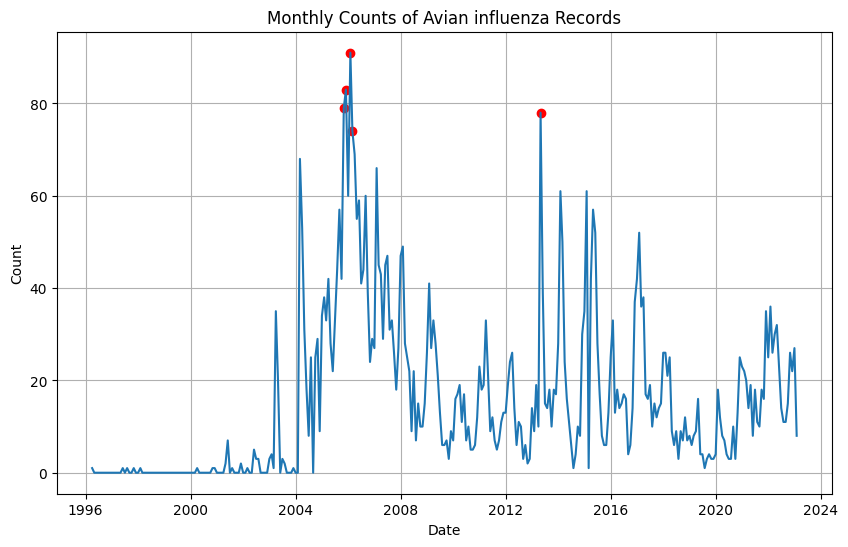

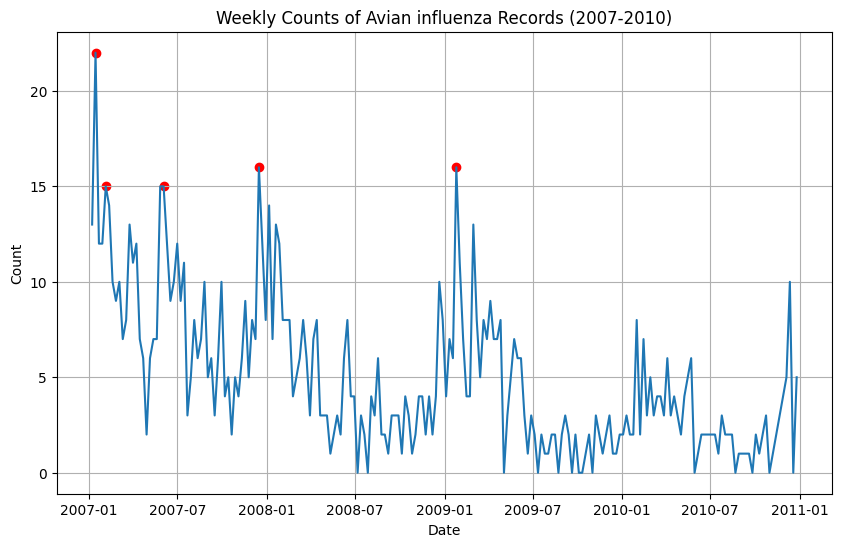

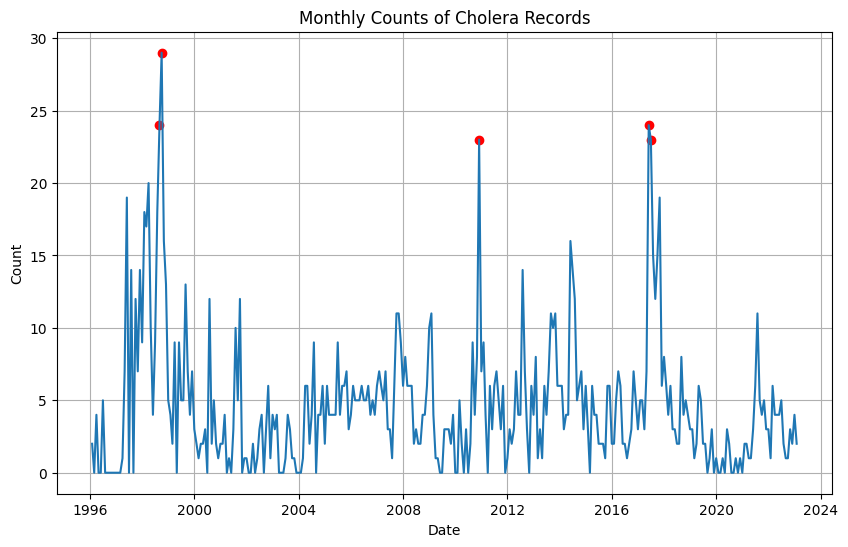

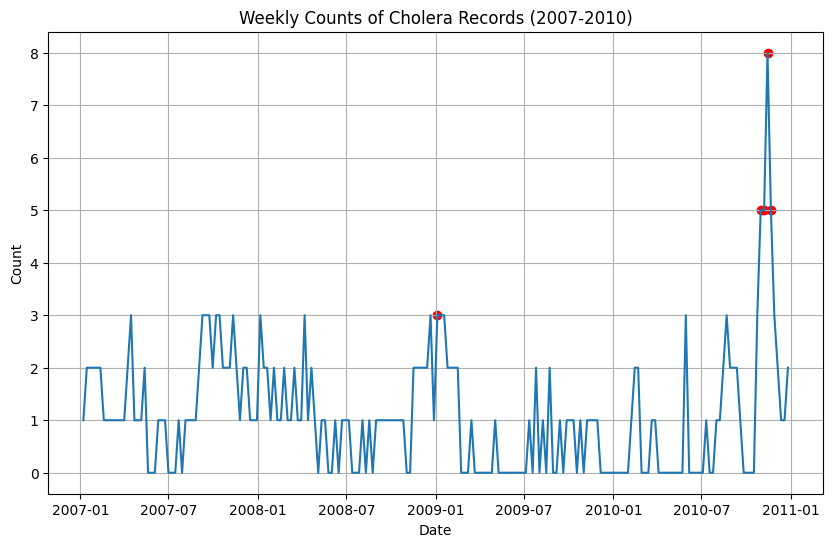

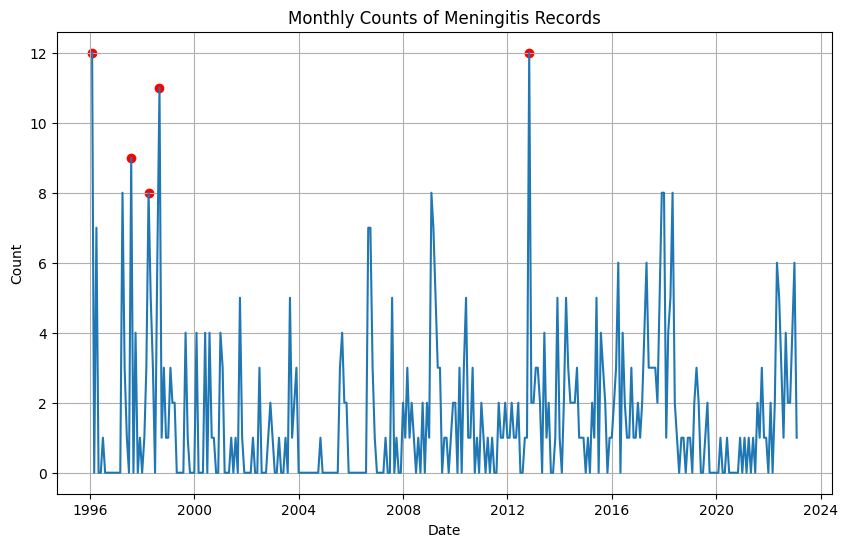

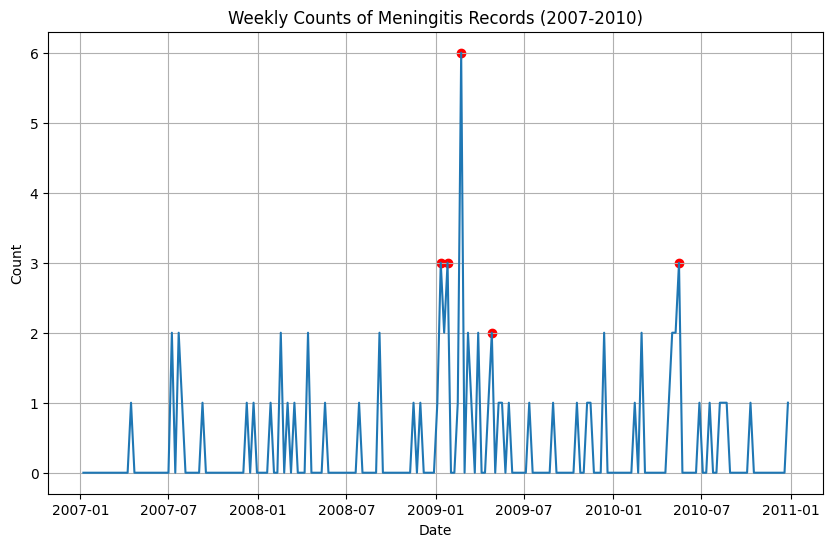

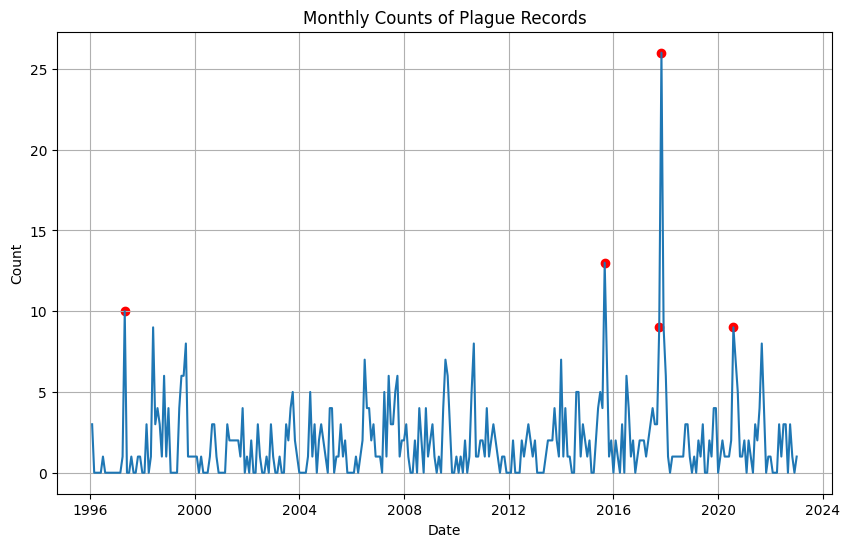

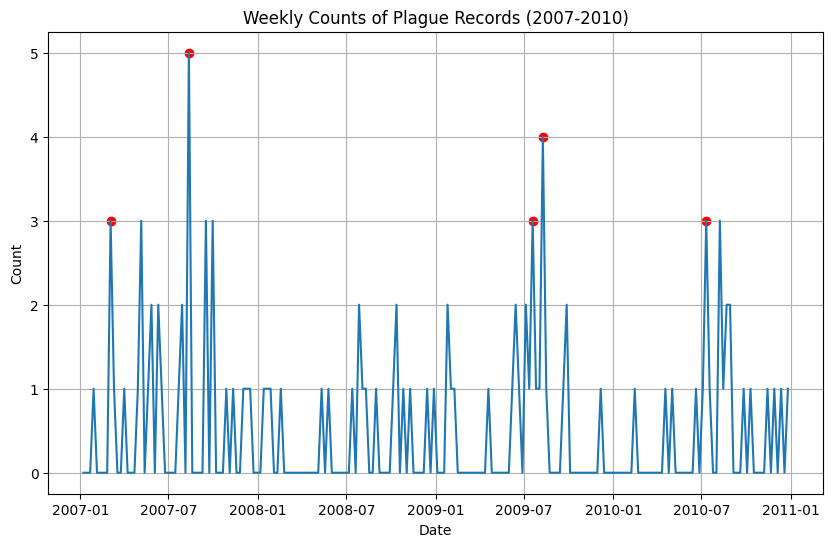

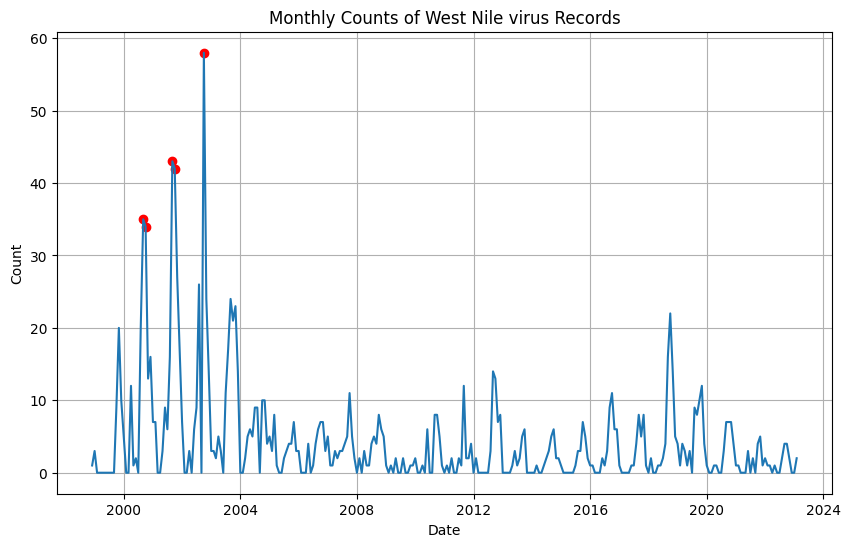

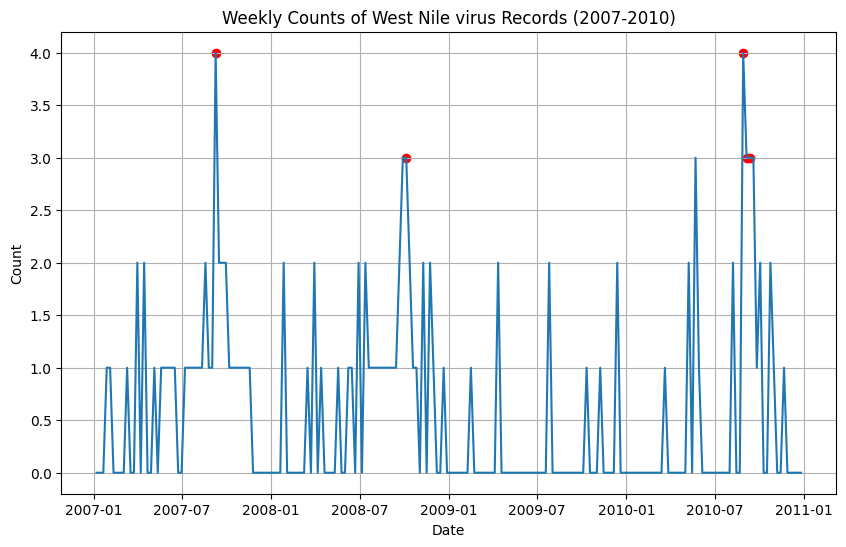

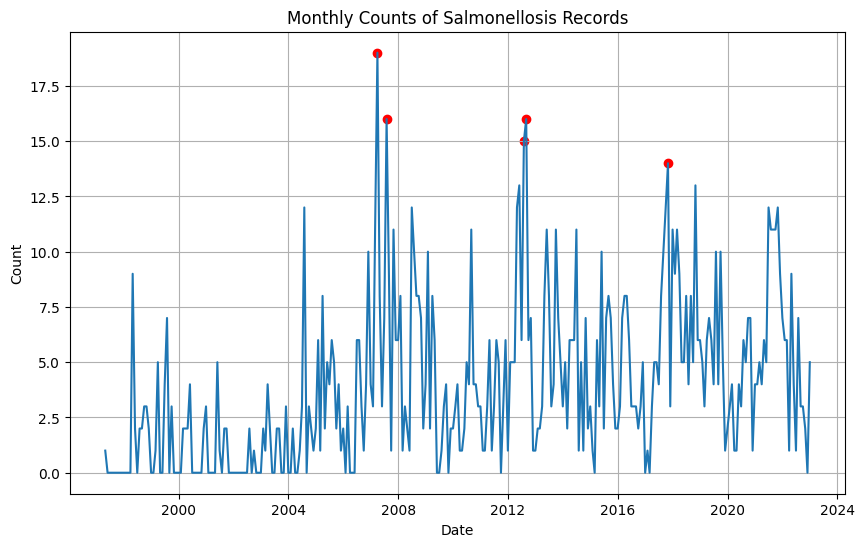

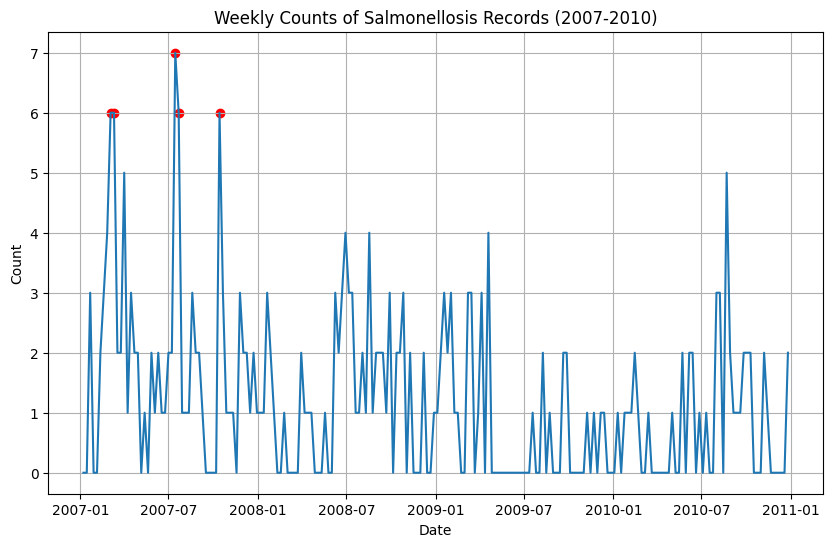

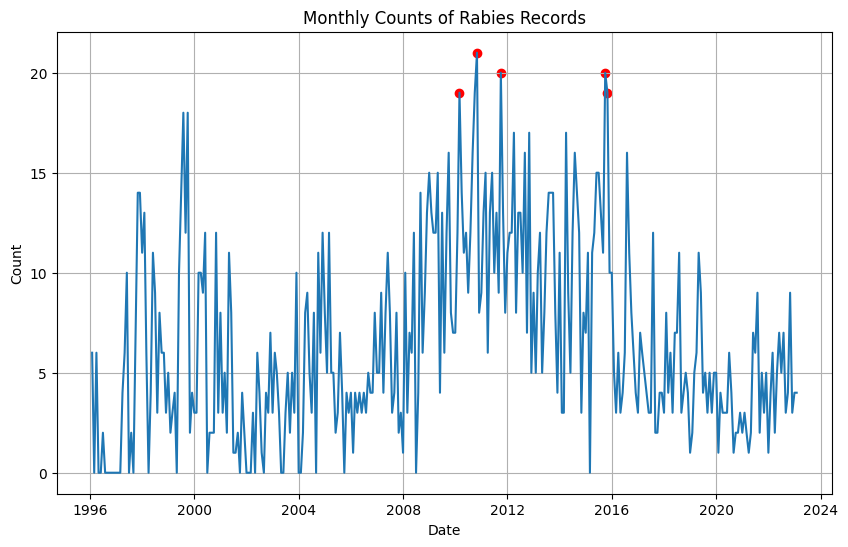

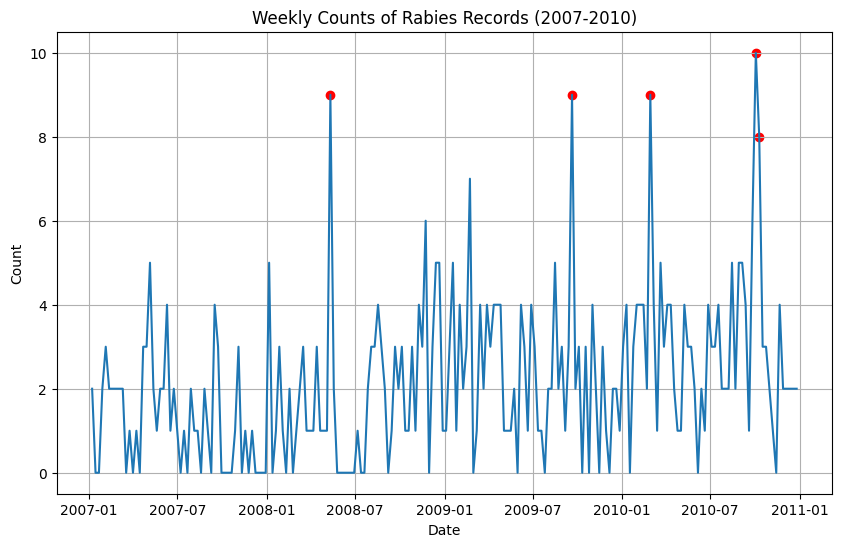

In [14]:
for disease, disease_df in relevant_promed_dfs.items():
    # print(f"Processing {disease} DataFrame")
    
    # Get the top 5 peaks for monthly and weekly data
    top_monthly_peaks = peak_data[disease]['Promed']['Monthly']
    top_weekly_peaks_filtered = peak_data[disease]['Promed']['Weekly (2007-2010)']
    
    # Resample the data to a monthly frequency and count the number of records within each time period
    monthly_counts = disease_df.resample('M').count()
    monthly_counts = monthly_counts[['id1']].rename(columns={'id1': 'count'})
    monthly_counts.reset_index(inplace=True)
    
    # Create a line plot of the monthly counts
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_counts['date'], monthly_counts['count'])
    plt.scatter(top_monthly_peaks['date'], top_monthly_peaks['count'], color='r', marker='o')
    
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Monthly Counts of {disease} Records')
    plt.grid(True)
    plt.show()
    
    # Resample the data to a weekly frequency and count the number of records within each time period
    weekly_counts = disease_df.resample('W').count()
    weekly_counts = weekly_counts[['id1']].rename(columns={'id1': 'count'})
    weekly_counts.reset_index(inplace=True)
    
    # Filter the weekly_counts DataFrame to include data from 2007 to 2010
    weekly_counts_filtered = weekly_counts[(weekly_counts['date'] >= '2007-01-01') & (weekly_counts['date'] <= '2010-12-31')]
    
    # Create a line plot of the weekly counts for the specified time range
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_counts_filtered['date'], weekly_counts_filtered['count'])
    plt.scatter(top_weekly_peaks_filtered['date'], top_weekly_peaks_filtered['count'], color='r', marker='o')
    
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Weekly Counts of {disease} Records (2007-2010)')
    plt.grid(True)
    plt.show()


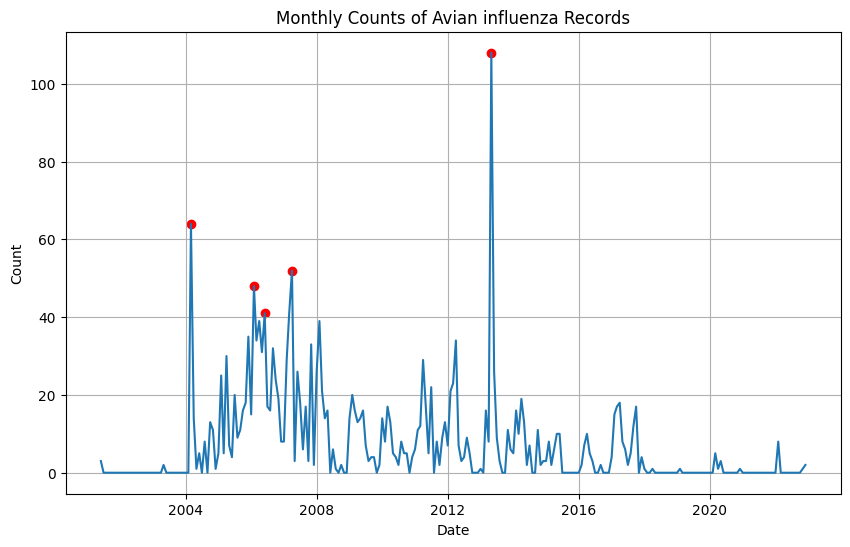

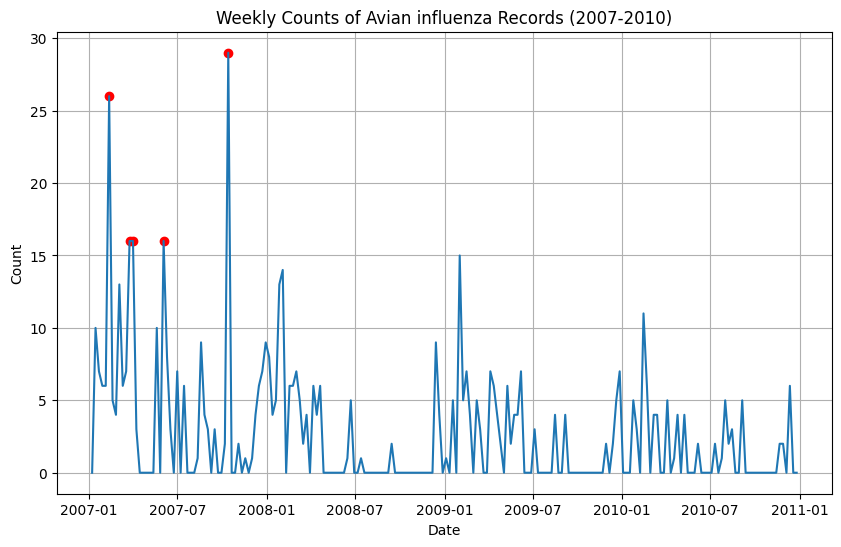

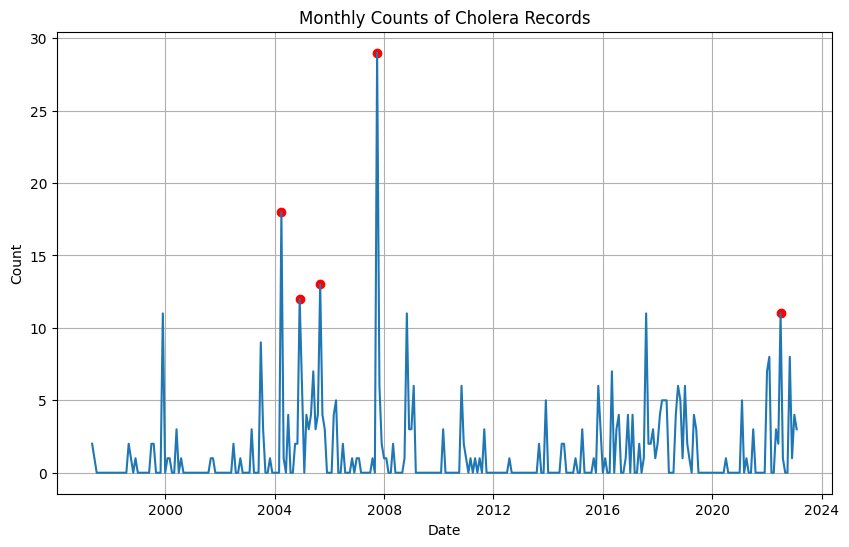

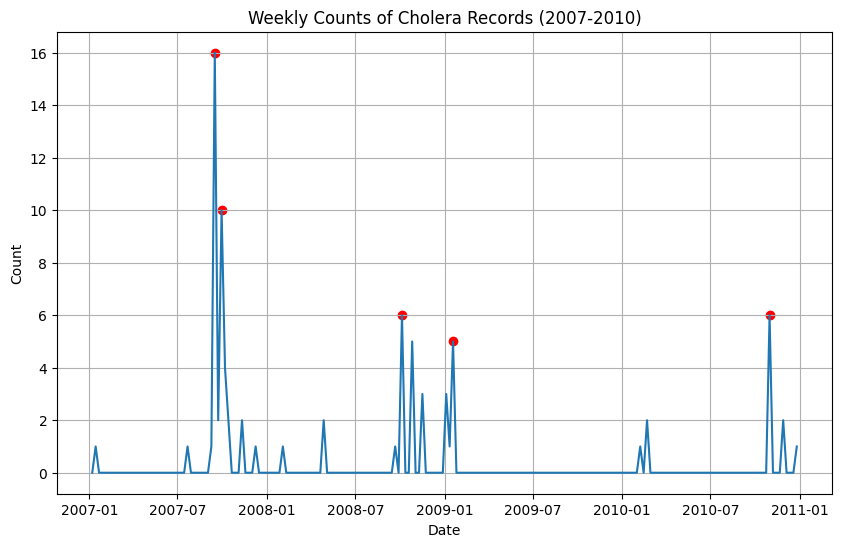

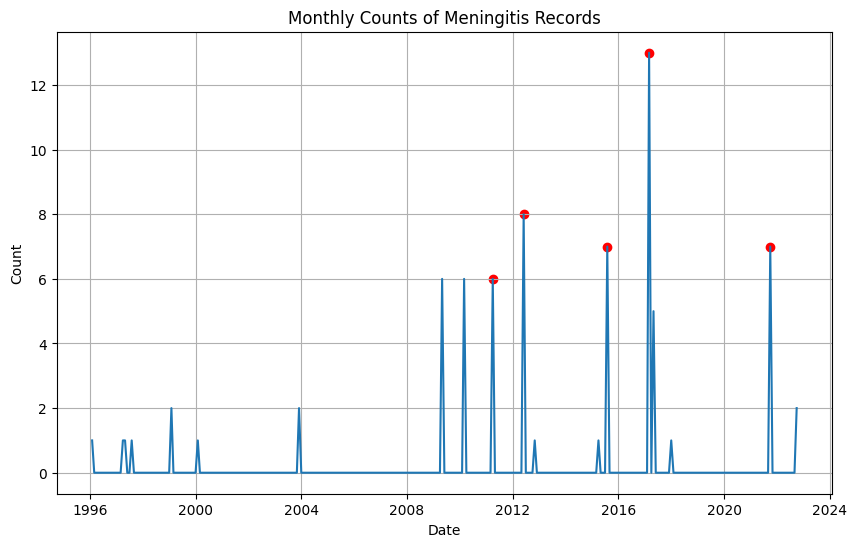

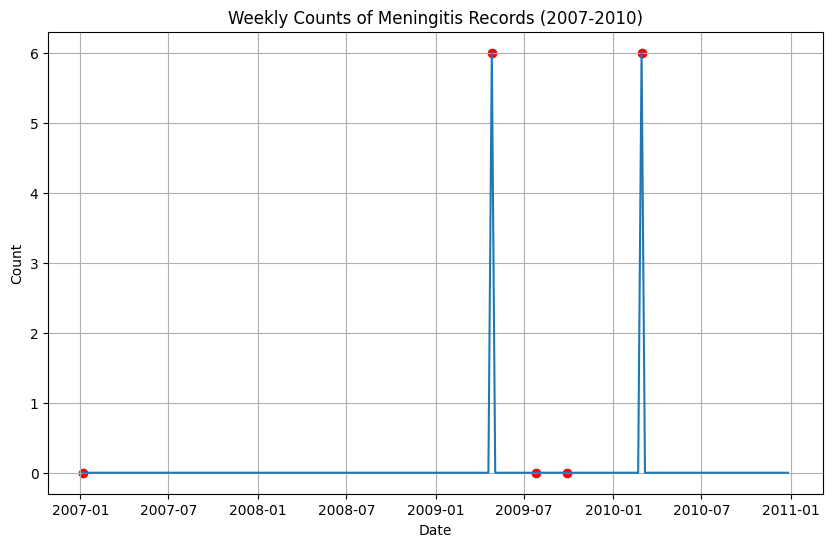

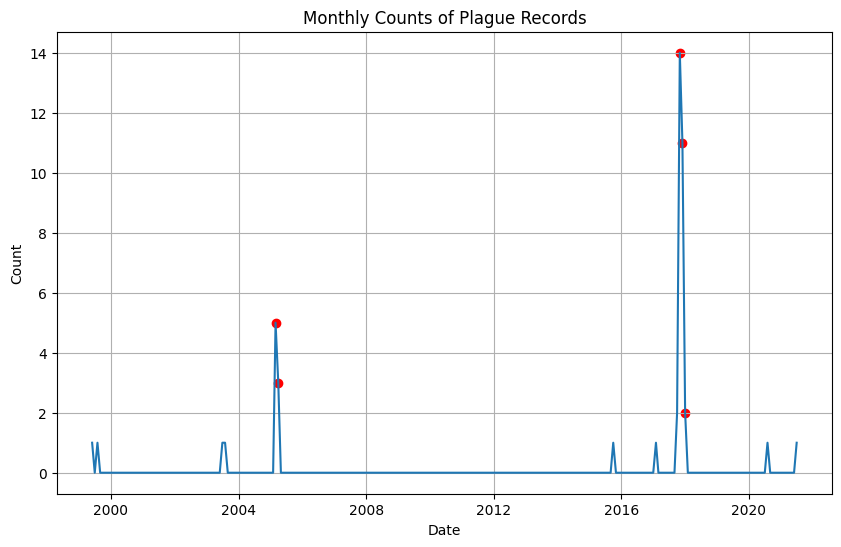

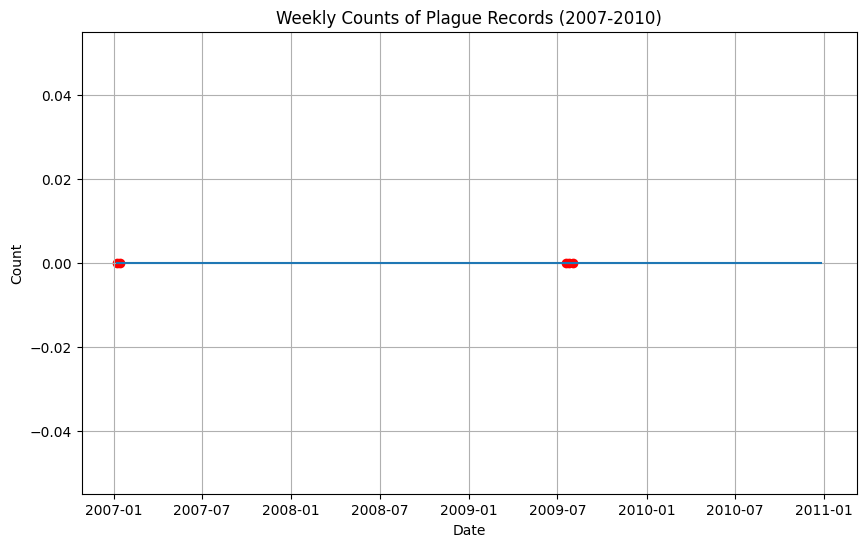

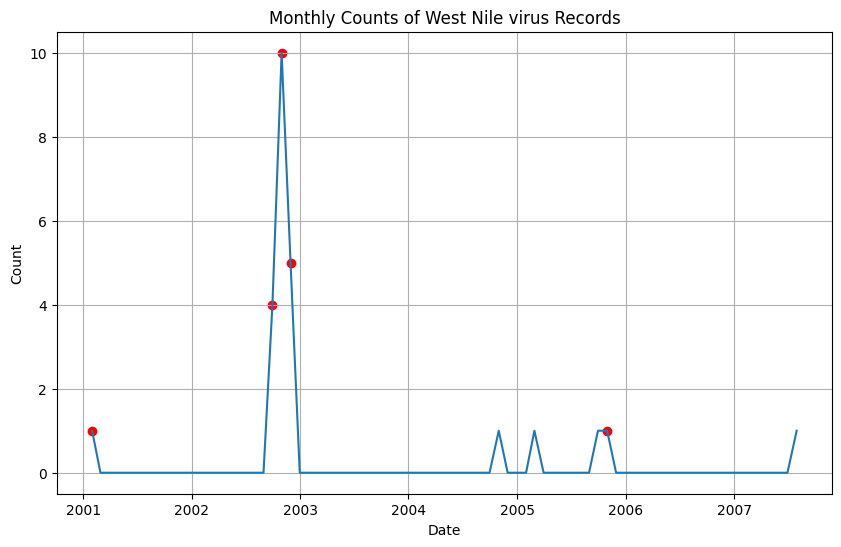

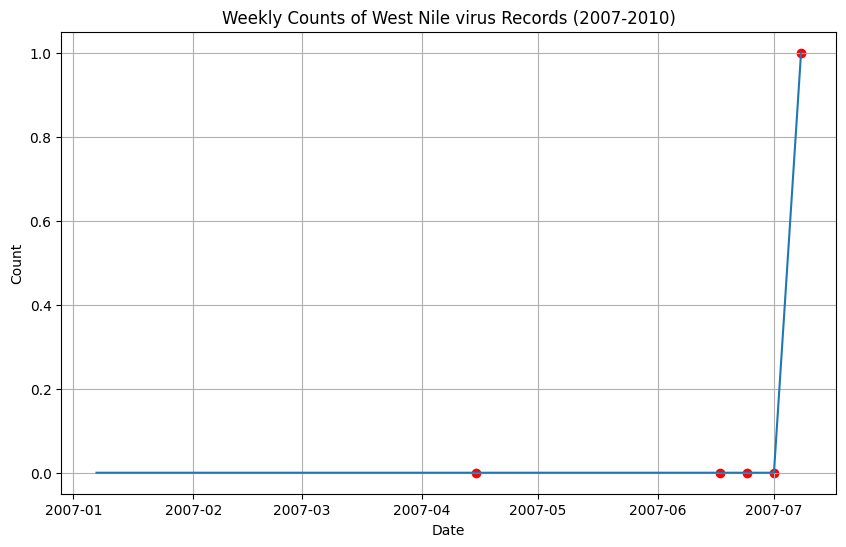

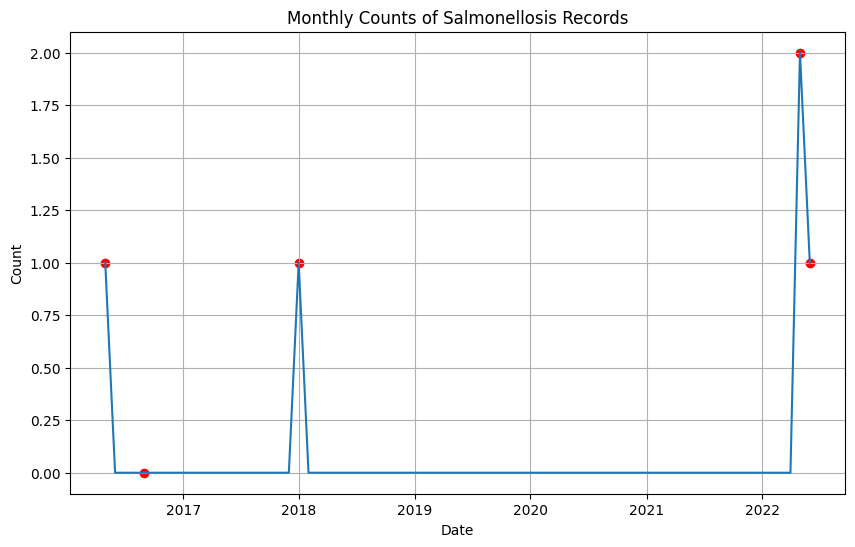

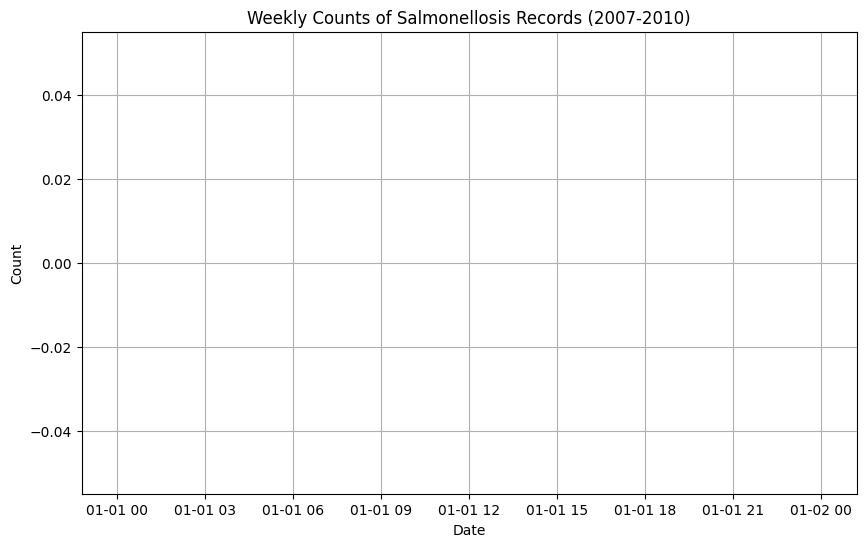

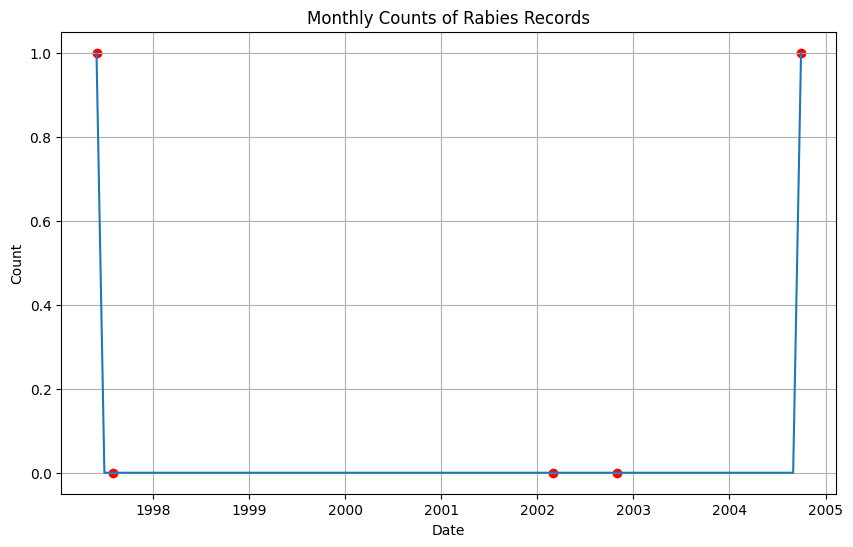

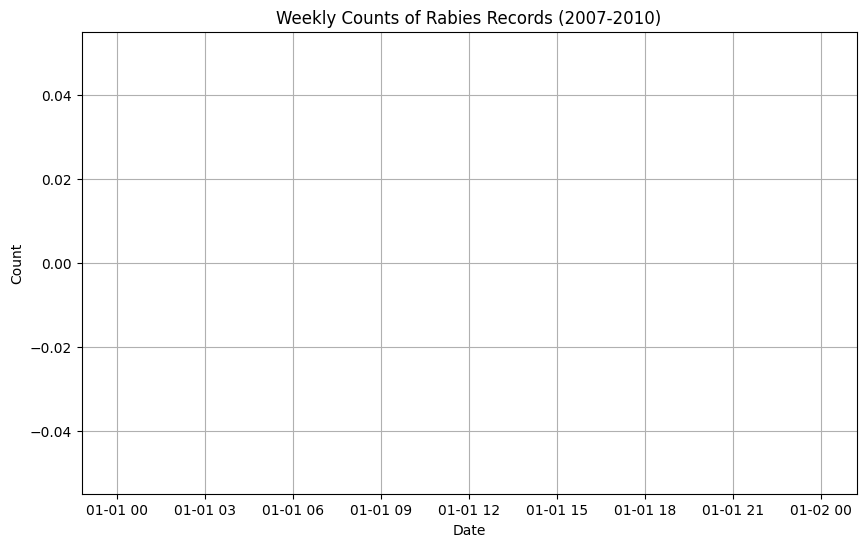

In [15]:
for disease, disease_df in relevant_who_dfs.items():
    # print(f"Processing {disease} DataFrame")
    
    # Get the top 5 peaks for monthly and weekly data
    top_monthly_peaks = peak_data[disease]['WHO']['Monthly']
    top_weekly_peaks_filtered = peak_data[disease]['WHO']['Weekly (2007-2010)']
    
    # Resample the data to a monthly frequency and count the number of records within each time period
    monthly_counts = disease_df.resample('M').count()
    monthly_counts = monthly_counts[['who_link']].rename(columns={'who_link': 'count'})
    monthly_counts.reset_index(inplace=True)
    
    # Create a line plot of the monthly counts
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_counts['date'], monthly_counts['count'])
    plt.scatter(top_monthly_peaks['date'], top_monthly_peaks['count'], color='r', marker='o')
    
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Monthly Counts of {disease} Records')
    plt.grid(True)
    plt.show()
    
    # Resample the data to a weekly frequency and count the number of records within each time period
    weekly_counts = disease_df.resample('W').count()
    weekly_counts = weekly_counts[['who_link']].rename(columns={'who_link': 'count'})
    weekly_counts.reset_index(inplace=True)
    
    # Filter the weekly_counts DataFrame to include data from 2007 to 2010
    weekly_counts_filtered = weekly_counts[(weekly_counts['date'] >= '2007-01-01') & (weekly_counts['date'] <= '2010-12-31')]
    
    # Create a line plot of the weekly counts for the specified time range
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_counts_filtered['date'], weekly_counts_filtered['count'])
    plt.scatter(top_weekly_peaks_filtered['date'], top_weekly_peaks_filtered['count'], color='r', marker='o')
    
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Weekly Counts of {disease} Records (2007-2010)')
    plt.grid(True)
    plt.show()
